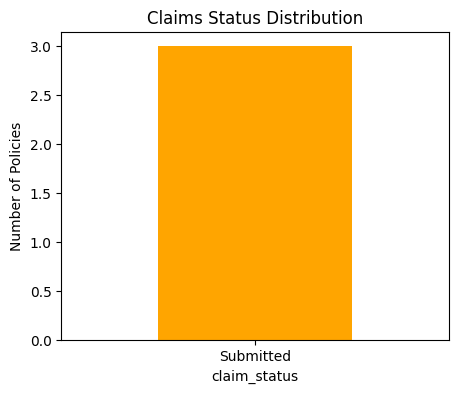

Dropdown(description='Policy:', options=('POL001 - Alice', 'POL002 - Bob', 'POL003 - Charlie'), value='POL001 …

Label(value='Customer: Alice\nPhone: 9876543210\nProperty Address: 123 Main St\nInsurance Amount: $1000000\nCl…

Button(button_style='success', description='Submit Claim', style=ButtonStyle())

Output()

Label(value='📊 Total Policies: 3 | ✅ Submitted: 3 | ⏳ Pending: 0')

Output()

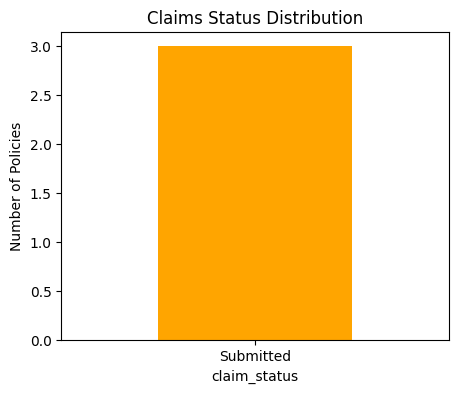

In [1]:
# ==============================
# Full Interactive Property Insurance Dashboard with Table and Charts
# ==============================

import os
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# 1. Set paths
project_path = r"D:\Banking DS Project\Claims Dashboard"
claims_csv = os.path.join(project_path, "Property_Insurance_Claims.csv")

# 2. Create CSV if not exists
if not os.path.exists(claims_csv):
    data = {
        "policy_id": ["POL001", "POL002", "POL003", "POL004"],
        "customer_name": ["Alice", "Bob", "Charlie", "David"],
        "phone_number": ["9876543210", "9123456780", "9988776655", "9112233445"],
        "insurance_amount": [1000000, 750000, 500000, 1200000],
        "property_address": ["123 Main St", "456 Elm St", "789 Oak St", "321 Pine St"],
        "claim_status": ["Not Submitted"]*4
    }
    df = pd.DataFrame(data)
    df.to_csv(claims_csv, index=False)
    print("Property Insurance CSV created with sample data.")

# 3. Load CSV
claims_df = pd.read_csv(claims_csv)

# 4. Filters
amount_min = widgets.IntText(value=0, description='Min Amount:')
amount_max = widgets.IntText(value=2000000, description='Max Amount:')
address_filter = widgets.Text(value='', description='Address Filter:')

# 5. Policy selection dropdown
policy_dropdown = widgets.Dropdown(description='Policy:')

# 6. Submit claim button
submit_button = widgets.Button(description="Submit Claim", button_style='success')
output = widgets.Output()

# 7. KPI label
kpi_label = widgets.Label()

# 8. Table output
table_output = widgets.Output()

# Function to filter dataframe
def filter_df():
    df = claims_df[
        (claims_df['insurance_amount'] >= amount_min.value) &
        (claims_df['insurance_amount'] <= amount_max.value)
    ]
    if address_filter.value.strip():
        df = df[df['property_address'].str.contains(address_filter.value, case=False)]
    return df

# Update policy dropdown based on filters
def update_policy_dropdown(change=None):
    df_filtered = filter_df()
    options = [f"{row['policy_id']} - {row['customer_name']}" for idx, row in df_filtered.iterrows()]
    if options:
        policy_dropdown.options = options
        policy_dropdown.value = options[0]
    else:
        policy_dropdown.options = []
    update_kpis()
    update_table()
    update_charts()

# Update details label
details_label = widgets.Label(value="Select a policy to see details.")
def update_details(change):
    if policy_dropdown.options:
        policy_id = policy_dropdown.value.split(' - ')[0]
        row = claims_df.loc[claims_df['policy_id']==policy_id].iloc[0]
        details_label.value = (
            f"Customer: {row['customer_name']}\n"
            f"Phone: {row['phone_number']}\n"
            f"Property Address: {row['property_address']}\n"
            f"Insurance Amount: ${row['insurance_amount']}\n"
            f"Claim Status: {row['claim_status']}"
        )

# Submit claim
def submit_claim(b):
    if policy_dropdown.options:
        policy_id = policy_dropdown.value.split(' - ')[0]
        claims_df.loc[claims_df['policy_id']==policy_id, 'claim_status'] = 'Submitted'
        claims_df.to_csv(claims_csv, index=False)
        with output:
            clear_output()
            print(f"✅ Claim successfully submitted for Policy ID: {policy_id}!")
        update_details({'new': policy_dropdown.value})
        update_kpis()
        update_table()
        update_charts()

# KPIs
def update_kpis():
    df_filtered = filter_df()
    total = len(df_filtered)
    submitted = (df_filtered['claim_status'] == 'Submitted').sum()
    pending = total - submitted
    kpi_label.value = f"📊 Total Policies: {total} | ✅ Submitted: {submitted} | ⏳ Pending: {pending}"

# Table of policies
def update_table():
    df_filtered = filter_df()
    with table_output:
        clear_output()
        if df_filtered.empty:
            print("No policies match the filters.")
        else:
            display(df_filtered[['policy_id','customer_name','phone_number','property_address','insurance_amount','claim_status']])

# Charts
def update_charts():
    df_filtered = filter_df()
    status_counts = df_filtered['claim_status'].value_counts()
    plt.figure(figsize=(5,4))
    status_counts.plot(kind='bar', color=['orange','green'])
    plt.title("Claims Status Distribution")
    plt.ylabel("Number of Policies")
    plt.xticks(rotation=0)
    plt.show()

# Connect events
amount_min.observe(update_policy_dropdown, names='value')
amount_max.observe(update_policy_dropdown, names='value')
address_filter.observe(update_policy_dropdown, names='value')
policy_dropdown.observe(update_details, names='value')
submit_button.on_click(submit_claim)

# Initialize
update_policy_dropdown()
update_details({'new': policy_dropdown.value})

# Display Dashboard
display(widgets.HBox([amount_min, amount_max, address_filter]))
display(policy_dropdown)
display(details_label)
display(submit_button)
display(output)
display(kpi_label)
display(table_output)
update_charts()
